In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Max = pd.Series([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = pd.Series([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
Month=pd.Series(np.arange(1,13))
df=pd.concat([Month,Max,Min],axis=1)
df.columns=['Month','Max','Min']
df.head()

,Month,Max,Min
0,1,39,21
1,2,41,23
2,3,43,27
3,4,47,28
4,5,49,32


In [3]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    #print(times,avg,ampl,time_offset)
    #print((avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max())))
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, _ = optimize.curve_fit(yearly_temps, df['Month'],df['Max'], [20, 10, 0])
res_min, _ = optimize.curve_fit(yearly_temps, df['Month'],df['Min'], [-40, 20, 0])

In [4]:
print(res_max)

[ 39.25       -11.01878019   0.97111097]


In [5]:
print(res_min)

[25.         -7.86539576  0.4895256 ]


In [6]:
days = np.linspace(0, 12, num=365)
#print(days)

Text(0.5, 1.0, 'Yearly Max/Min Periodic')

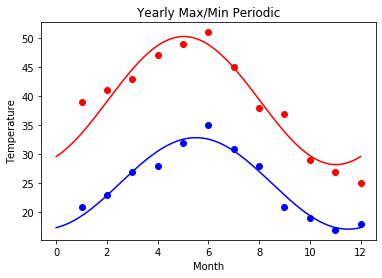

In [7]:
plt.plot(df['Month'], df['Max'],'ro')
plt.plot(days, yearly_temps(days, res_max[0],res_max[1],res_max[2]), 'r')
plt.plot(df['Month'], df['Min'],'bo')
plt.plot(days, yearly_temps(days, res_min[0],res_min[1],res_min[2]), 'b')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Yearly Max/Min Periodic')

In [8]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1f21d134708>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60')])

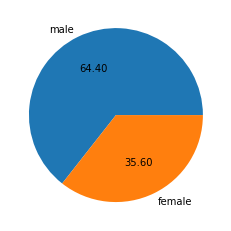

In [10]:
plt.pie(titanic['sex'].value_counts(),labels=['male','female'],autopct='%.2f')

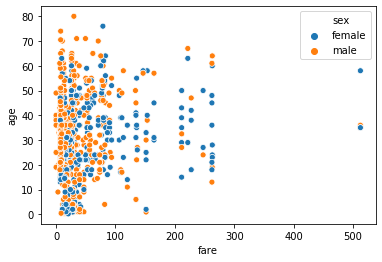

In [11]:
sns.scatterplot(x='fare',y='age',hue='sex', data=titanic)